In [ ]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf
from tensorflow import keras

# For accessing pretrained models
import tensorflow_hub as hub

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image
import cv2

import os
import numpy as np
import pathlib

In [ ]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rice-images/Rice_Image_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (5150).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (8267).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (8747).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (2970).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (10959).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (4976).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (730).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (9279).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (534).jpg
/kaggle/input/rice-images/Rice_Image_Dataset/Karacadag/Karacadag (9453).jpg
/kaggle/input/ric

In [40]:
# Data loading and splitting into classes
data_dir = pathlib.Path('/kaggle/input/rice-image-dataset/Rice_Image_Dataset')  # Corrected path
seed = 123

# Limit to 600 images per class
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

# Debug: Print the number of images per class
print(f"Arborio images: {len(arborio)}")
print(f"Basmati images: {len(basmati)}")
print(f"Ipsala images: {len(ipsala)}")
print(f"Jasmine images: {len(jasmine)}")
print(f"Karacadag images: {len(karacadag)}")

# Combine and label
all_images = [(str(p), 0) for p in arborio] + [(str(p), 1) for p in basmati] + \
             [(str(p), 2) for p in ipsala] + [(str(p), 3) for p in jasmine] + \
             [(str(p), 4) for p in karacadag]

# Debug: Check the total number of images
print(f"Total images in all_images: {len(all_images)}")

# Shuffle the dataset
import random
random.shuffle(all_images)

# Extract file paths and labels
file_paths, labels = zip(*all_images)

# Debug output
print(len(all_images))  # Should be 3000
print(file_paths[:5])   # First 5 file paths

Arborio images: 600
Basmati images: 600
Ipsala images: 600
Jasmine images: 600
Karacadag images: 600
Total images in all_images: 3000
3000
('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (1342).jpg', '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (10690).jpg', '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (1752).jpg', '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (14729).jpg', '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (9313).jpg')


In [41]:
# Split data into train, validation, and test sets
from sklearn.model_selection import train_test_split

# Split: 80% train, 10% val, 10% test
images_train, images_temp, labels_train, labels_temp = train_test_split(
    preprocessed_images, preprocessed_labels, test_size=0.2, random_state=123, stratify=preprocessed_labels
)
images_val, images_test, labels_val, labels_test = train_test_split(
    images_temp, labels_temp, test_size=0.5, random_state=123, stratify=labels_temp
)

# Debug output
print("Train set size:", len(images_train))
print("Validation set size:", len(images_val))
print("Test set size:", len(images_test))

Train set size: 2400
Validation set size: 300
Test set size: 300


In [42]:
# ✅ Create TensorFlow dataset
ds = tf.data.Dataset.from_tensor_slices((list(file_paths), list(labels)))

# ✅ Preprocess function
def preprocess(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [250, 250])
    img = img / 255.0
    return img, label

ds = ds.map(preprocess)

# Debug: Test one example
for img, lbl in ds.take(1):
    print("Image shape:", img.shape, "Label:", lbl.numpy())

print("Image preprocessing completed")

Image shape: (250, 250, 3) Label: 2
Image preprocessing completed


In [10]:
# Precompute preprocessed dataset
import numpy as np

# Function to get preprocessed images
def get_preprocessed_data(ds):
    images = []
    labels = []
    for img, lbl in ds:
        images.append(img.numpy())
        labels.append(lbl.numpy())
    return np.array(images), np.array(labels)

# Compute and store
preprocessed_images, preprocessed_labels = get_preprocessed_data(ds)

# Debug output
print("Preprocessed images shape:", preprocessed_images.shape)
print("Labels shape:", preprocessed_labels.shape)

Preprocessed images shape: (3000, 128, 128, 3)
Labels shape: (3000,)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 500ms/step - accuracy: 0.6264 - loss: 0.8569 - val_accuracy: 0.9333 - val_loss: 0.1850
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 491ms/step - accuracy: 0.9442 - loss: 0.1618 - val_accuracy: 0.9567 - val_loss: 0.1331
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 491ms/step - accuracy: 0.9726 - loss: 0.0889 - val_accuracy: 0.9667 - val_loss: 0.1180
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 506ms/step - accuracy: 0.9722 - loss: 0.0777 - val_accuracy: 0.9533 - val_loss: 0.1266
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 492ms/step - accuracy: 0.9795 - loss: 0.0541 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 495ms/step - accuracy: 0.9786 - loss: 0.0517 - val_accuracy: 0.9700 - val_loss: 0.1182
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 503ms/step - accuracy: 0.9820 - loss: 0.0419 - val_accuracy: 0.9567 - val_loss: 0.1577
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 510ms/step - accuracy: 0.9849 - loss: 0.0386 - val_accu

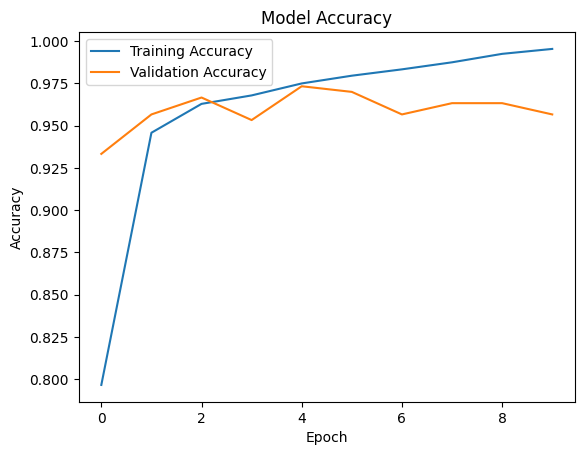

In [15]:
# Build and train the model
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Adjust to your size
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_val, labels_val))

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(images_test, labels_test)
print("Test accuracy:", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


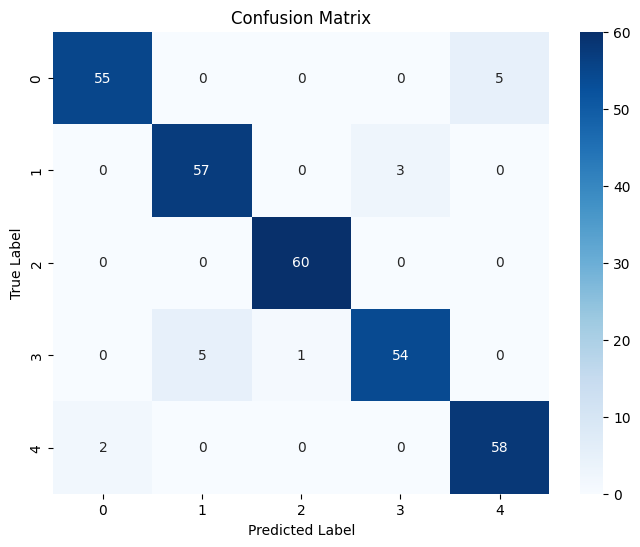

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.96      0.92      0.94        60
     Basmati       0.92      0.95      0.93        60
      Ipsala       0.98      1.00      0.99        60
     Jasmine       0.95      0.90      0.92        60
   Karacadag       0.92      0.97      0.94        60

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 506ms/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.9633 - val_loss: 0.1433
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 506ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.9633 - val_loss: 0.1447
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 503ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9667 - val_loss: 0.1636
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 487ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.

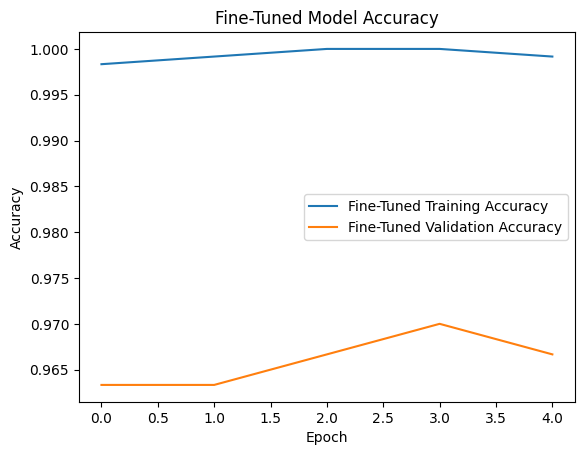

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9615 - loss: 0.2046
Improved Test Accuracy: 0.949999988079071


In [16]:
# Detailed evaluation and improvement
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
test_predictions = model.predict(images_test)
test_pred_labels = np.argmax(test_predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels_test, test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(labels_test, test_pred_labels, target_names=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']))

# Improve model (example: increase epochs or adjust learning rate)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(images_train, labels_train, epochs=5, validation_data=(images_val, labels_val))

# Plot new training history
plt.plot(history_fine.history['accuracy'], label='Fine-Tuned Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuned Validation Accuracy')
plt.title('Fine-Tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Re-evaluate
test_loss, test_accuracy = model.evaluate(images_test, labels_test)
print("Improved Test Accuracy:", test_accuracy)

In [33]:
import pathlib
import numpy as np
import tensorflow as tf

# Load test data from all subfolders
test_dir = pathlib.Path('/kaggle/input/rice-image-dataset/Rice_Image_Dataset')
print(f"Test directory: {test_dir}, Exists: {test_dir.exists()}")
test_images = [str(p) for p in test_dir.glob('*/*')]  # Gets all images in subfolders
print(f"Number of test images found: {len(test_images)}")

# Check if test images are found
if not test_images:
    raise ValueError(f"No images found in {test_dir}. Check the path or dataset structure. Available directories: {list(pathlib.Path('/kaggle/input').glob('*'))}")

# Continue with preprocessing and prediction...

Test directory: /kaggle/input/rice-image-dataset/Rice_Image_Dataset, Exists: True
Number of test images found: 75000


In [34]:
model.save('rice_classifier_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [38]:
# ✅ Train-val split
train_size = int(0.8 * len(all_images))
train_ds = ds.take(train_size).shuffle(1000).batch(32)
val_ds = ds.skip(train_size).batch(32)
print("Train dataset size:", len(list(train_ds)))  # Debug: Train set size
print("Val dataset size:", len(list(val_ds)))      # Debug: Val set size

# Build the CNN model
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize pixels
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
])


Train dataset size: 75
Val dataset size: 19


In [44]:
print(tf.__version__)  # Prints the TensorFlow version
print("Imports successful!")

2.18.0
Imports successful!


In [43]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize pixels

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)